Program to analyze the peerformance of the Jacobi solver given its output.

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\Jacobi\\gpu_jacobi_cores'

In [2]:
def get_averages(filename):
    colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
    data_frame = pd.read_csv(filename, names=colnames, header=None)
    averages = data_frame.mean(axis=0)
    return round(averages, 3)

In [3]:
filenames = ['gpu_jacobi_cores_2.csv', 'gpu_jacobi_cores_4.csv', 'gpu_jacobi_cores_8.csv', 'gpu_jacobi_cores_12.csv', 'gpu_jacobi_cores_24.csv']
Maxtimes = []
Mintimes = []
JacobiMin = []
JacobiMax = []
Residuals = []
MLUPs = []

for filename in filenames:
    averages = get_averages(filename)
    Maxtimes.append(averages[0])
    Mintimes.append(averages[1])
    JacobiMin.append(averages[2])
    JacobiMax.append(averages[3])
    Residuals.append(averages[4])
    MLUPs.append(averages[5])

Maxtimes = np.array(Maxtimes)
Mintimes = np.array(Mintimes)
JacobiMax = np.array(JacobiMax)
JacobiMin = np.array(JacobiMin)
Residuals = np.array(Residuals)
MLUPs = np.array(MLUPs)

#### Performance analysis

In [4]:
def theoretical_comm_time(c,B,k,latency):
        return c/B + latency*k

def theoretical_perf(N, L, time, communic_time):
    L_3 = L**3/10**6
    return (L_3 * N) / 22.314 # T_s estimated via computation on single core

In [7]:
def plot_performance(JacobiMax, MLUPs):

    L = 1200
    N = np.array([1, 2, 4, 8, 12, 24])
    k = np.array([0, 2, 4, 6, 6, 6])
    const = L**2 * 2 * 8 # bytes
    c = np.array([0, const*2, const*4, const*6, const*6, const*6])
    c = c/10**(6) # Mb

    latency = 0.23*10**(-6) # seconds
    B = 6209.8 # Mb/s

    theoretical_c_time = theoretical_comm_time(c,B,k,latency) # seconds

    JacobiMax = np.insert(JacobiMax, 0, 22.314) #seconds

    theoretical_performance = theoretical_perf(N, L, JacobiMax, theoretical_c_time) # MLUP/s

    MLUPs = np.insert(MLUPs, 0, 77.439)

    plt.figure()
    plt.scatter(N, MLUPs)
    plt.plot(N, MLUPs, label='Measured performance')
    plt.scatter(N, theoretical_performance, alpha=0.7, marker='v')
    plt.plot(N, theoretical_performance, label='Theoretical performance', alpha=0.7)
    plt.title('Intra-socket')
    plt.xlabel("Number of processes")
    plt.ylabel('Performance [MLUPs/s]')
    plt.legend()
    plt.show()


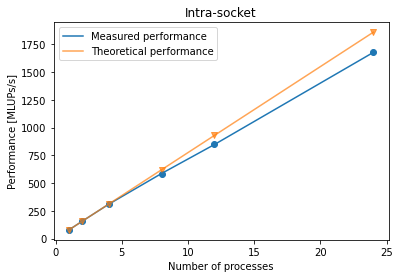

In [8]:
plot_performance(JacobiMax, MLUPs)

In [10]:
Maxtimes = np.delete(Maxtimes, 0)

Runtime

In [12]:
thin_cores_times = np.array([15.334, 3.861, 1.958, 1.321])
N_cores = np.array([1,4,8,12])

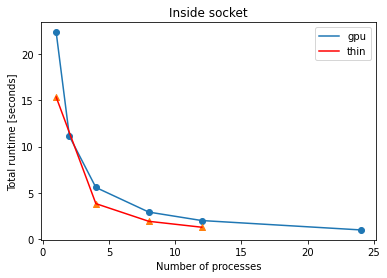

In [13]:
sc_gpu_Maxtime = 22.314

#Maxtimes = np.insert(Maxtimes, 0, sc_gpu_Maxtime)
N = np.array([1,2,4,8,12,24])

plt.figure()
plt.scatter(N, Maxtimes)
plt.plot(N, Maxtimes, label = 'gpu')
plt.scatter(N_cores, thin_cores_times, marker="^", cmap="r")
plt.plot(N_cores, thin_cores_times,'r', label = "thin")
plt.title('Inside socket')
plt.xlabel("Number of processes")
plt.ylabel("Total runtime [seconds]")
plt.legend()
plt.show()

Speedup

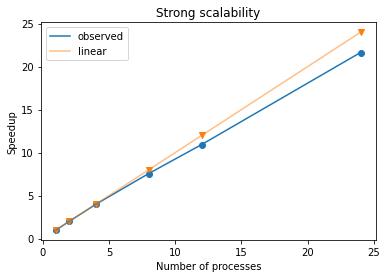

In [7]:
speedup = np.divide(Maxtimes[0], Maxtimes)


plt.figure()
plt.scatter(N, speedup)
plt.plot(N, speedup, label='observed')
plt.scatter(N,N, marker="v")
plt.plot(N,N, label = 'linear', alpha=0.5)
plt.title('Strong scalability')
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.legend()
plt.show()